<center><h1>Computational Statistics:</h1></center>
<center><h1>Permutation Testing</h1></center>

Preview
-------

- Learn to use Python's `random` module
- Simulate common probablitiies

In [35]:
reset -fs

Is a drug effective or not?
-----

In [36]:
drug    = [54, 73, 53, 70, 73, 68, 52, 65, 65]
placebo = [54, 51, 58, 44, 55, 52, 42, 47, 58, 46]

What should we do?

In [37]:
# Python's statitics module provides functions for calculating mathematical statistics of numeric (real-valued) data
# from statistics import 

In [38]:
from statistics import mean

In [39]:
observed_diff = mean(drug) - mean(placebo)
observed_diff

12.966666666666661

That number is ugly and hard to read. 

In [40]:
# Use formated strings to make a human-readable version


In [41]:
print(f"{observed_diff:.2f}")

12.97


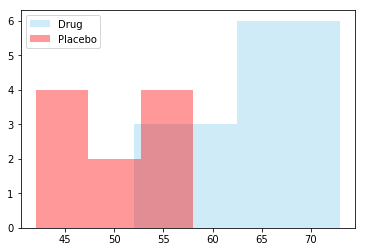

In [42]:
# Always visually inspect your data
import matplotlib.pylab as plt
import seaborn as sns # A library for statical plotting

%matplotlib inline

sns.distplot(drug, color="skyblue", label="Drug", kde=False);
sns.distplot(placebo, color="red", label="Placebo", kde=False);
plt.legend(); # Seaborn plots are interoperatable with matplotlib

What would look if there were no difference in the groups?
---------

It is the same if the labels were shuffled (with the same data).

In [43]:
combined = drug + placebo

In [44]:
from random import shuffle

shuffle(combined) # Rearrange in-place

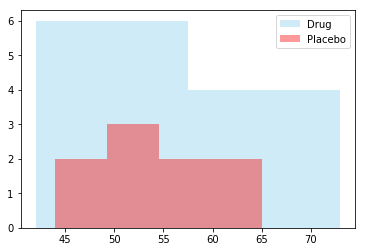

In [45]:
shuffle(combined) # Rearrange in-place

# Randomly assign to drug and placebo group
drug_random = combined[len(drug):]
placebo_random = combined[:len(drug)]

sns.distplot(drug_random, color="skyblue", label="Drug", kde=False);
sns.distplot(placebo_random, color="red", label="Placebo", kde=False);
plt.legend();

In [46]:
# Let's simulated it a bunch of times
n = 10_000
count = 0

for _ in range(n):
    shuffle(combined)
    new_diff = mean(combined[:len(drug)]) - mean(combined[len(drug):])
    count += (new_diff >= observed_diff)

In [47]:
print(f"""{n:,} label reshufflings produced only {count} instances with a difference
at least as extreme as the observed difference of {observed_diff:.1f}.""")

10,000 label reshufflings produced only 9 instances with a difference
at least as extreme as the observed difference of 13.0.


What is the p-values?

In [48]:
count / n

0.0009

What should we do?

Reject the null hypothesis that there is no difference between the drug and the placebo.""")

 The only hard part is deciding whether to do a one-sided test or a two-sided test.  It depends on what hypothesis you are testing.  If you think men are taller than women, or that the new drug is better than the old drug, then a one-sided test is appropriate.  If you think there is a difference between the groups but you don't know what it is, you can use a two-sided test; that is, use the absolute value of the difference as the test statistic.

This decision can seem arbitrary, but don't worry.  The effect on the p-value is just a factor of two, and (as I argued last time) we only care about the order of magnitude.  Whether the p-value is 2% or 4% or 8% doesn't really matter.

<center><h2>Any Questions?</h2></center>

<center><h2>Analytical vs Computational Hypothesis Testing</h2></center>

Steps for Analytical Hypothesis Testing
-----

1. Setup testing framework
    1. Create null and alternative hypothesis
    1. Set α
1. Collect data
1. Pick and calculate t-statistic
1. Calculate p-value
1. Draw conclusion

Steps for Computational Hypothesis Testing
-----

1. Setup testing framework
    1. Create null and alternative hypothesis
    1. Set α
1. Collect data
1. __Iterate while shuffling data__ to simulate null effect
1. Calculate p-value 
1. Draw conclusion

Comparing Analytical vs Computational Hypothesis
--------

__Almost all of the steps are the same.___

The only difference is:

- Analytical method uses domain and theoretical knowledge to pick the test statistic.
- Computational method uses fundamental computing (looping and random number generator) to simulate null effect.

Advantages of Computational Approach
-----

1) Analysis often dictates the test statistic; simulation lets you choose whatever test statistic is most appropriate.

2) Analytic methods are inflexible.  If you have issues like censored data, non-independence, and long-tailed distributions, you won't find an off-the-shelf test; and unless you are a mathematical statistician, you won't be able to make one.  With simulation, these kinds of issues are easy.

3) When people think of analytic methods as black boxes, they often fixate on finding the right test and figuring out how to apply it, instead of thinking carefully about the problem.

Student Activity: A, B, C testing for Conversions
------

dark_blue_button    = [0, 0, 0, 1, 1, 0, 0, 0]
darker_blue_button  = [0, 1, 0, 1, 0, 1, 0, 1]
darkest_blue_button = [1, 1, 1, 1, 1, 1]

<br>
<br> 
<br>

Linear Regression Example
-----

In [49]:
x = [95, 85, 80, 70, 60]
y = [85, 95, 70, 65, 70]

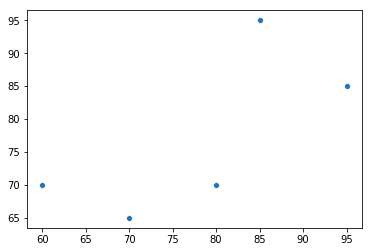

In [50]:
sns.scatterplot(x=x, y=y);

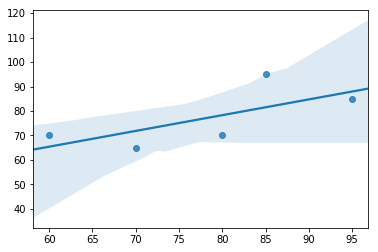

In [51]:
sns.regplot(x=x, y=y);

Estimate slope from points
------

$$slope = \frac{\sum_{i=1}^n (x_i- \bar x)(y_i- \bar y)}{\sum_{i=1}^n(x_i- \bar x)^2}$$

In [52]:
def slope(x, y):
    "Caculate the estimate the slope between x and y using least square method."
    x_mean = mean(x)
    y_mean = mean(y)
    numerator = sum((x[i]-x_mean)*(y[i]-y_mean) for i in range(len(x)))
    denominator = sum((x[i]-x_mean)**2 for i in range(len(x)))
    return  numerator/ denominator

In [53]:
observed_slope = slope(x, y)
print(f"{observed_slope:,.4f}")

0.6438


In [54]:
n = 10_000

count = 0
for i in range(n):
    shuffle(y)
    new_slope = slope(x, y)
    count += (new_slope >= observed_slope)

In [55]:
print(f"""{n:,} label reshufflings produced only {count:,} instances with a difference
at least as extreme as the observed difference of {observed_slope:.1f}.""")

10,000 label reshufflings produced only 1,167 instances with a difference
at least as extreme as the observed difference of 0.6.


In [56]:
count / n

0.1167

What should we do?

Conclude there is not significatn linear relationship between these variables

<br>
<br> 
<br>

The only question: "Is the apparent effect real, or is it due to chance?" 
--------

Thus, there is only one test in all hypothesis testing!
-----

Your turn, fair or loaded dice

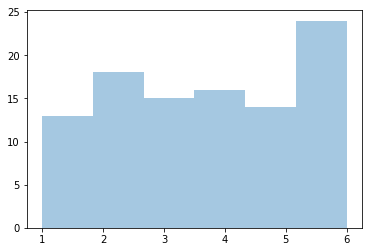

In [57]:
# TODO: Delete behand
# Create data 
from random import choices
# Six roulette wheel spins (weighted sampling with replacement)
data = choices(population=list(range(1, 7)),
        weights=[.155, .155, .155, .155, .155, .225], 
        k=100)
sns.distplot(data, bins=6, kde=False);

In [59]:
data

[2,
 2,
 4,
 6,
 2,
 4,
 3,
 2,
 2,
 5,
 5,
 4,
 3,
 1,
 5,
 5,
 1,
 6,
 3,
 2,
 3,
 6,
 2,
 3,
 5,
 6,
 6,
 5,
 1,
 3,
 6,
 4,
 5,
 6,
 4,
 2,
 6,
 5,
 1,
 3,
 6,
 6,
 4,
 4,
 4,
 2,
 3,
 5,
 3,
 2,
 4,
 5,
 6,
 3,
 2,
 2,
 2,
 2,
 6,
 5,
 6,
 4,
 2,
 1,
 6,
 1,
 4,
 1,
 1,
 6,
 1,
 5,
 3,
 6,
 4,
 3,
 6,
 6,
 6,
 6,
 6,
 3,
 3,
 1,
 4,
 4,
 4,
 1,
 4,
 1,
 2,
 2,
 6,
 6,
 5,
 6,
 3,
 5,
 1,
 2]

In [58]:
# Test just for number of 6s
n = 10_000

count = 0

count = 0
for i in range(n):
    shuffle(data)
    Counter(data)
    count += (new_slope >= observed_slope)

NameError: name 'Counter' is not defined

Summary
----

- Lorem
- Lorem


Resources
-------

- "[Statistics Without the Agonizing Pain](https://www.youtube.com/watch?v=5Dnw46eC-0o)" by John Rauser
- "[Statistics is Easy](https://www.amazon.com/Statistics-Second-Synthesis-Lectures-Mathematics/dp/160845570X)" by Dennis Shasha and Manda Wilson
- [Raymond Hettinger's Modern Python course](https://github.com/rhettinger/modernpython/blob/master/resampling.py)
- https://stattrek.com/regression/regression-example.aspx
- http://allendowney.blogspot.com/2011/05/there-is-only-one-test.html